In [1]:
!ls /Users/sampathm/Desktop/ReceiptSwiss_fullsize.jpg

/Users/sampathm/Desktop/ReceiptSwiss_fullsize.jpg


In [2]:
cp -p /Users/sampathm/Desktop/ReceiptSwiss_fullsize.jpg .

__Image__:

![Receipt Image](ReceiptSwiss_fullsize.jpg)



In [4]:
!which tesseract

/usr/local/bin/tesseract


In [7]:
!tesseract  --help-extra

Usage:
  tesseract --help | --help-extra | --help-psm | --help-oem | --version
  tesseract --list-langs [--tessdata-dir PATH]
  tesseract --print-parameters [options...] [configfile...]
  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]

OCR options:
  --tessdata-dir PATH   Specify the location of tessdata path.
  --user-words PATH     Specify the location of user words file.
  --user-patterns PATH  Specify the location of user patterns file.
  --dpi VALUE           Specify DPI for input image.
  -l LANG[+LANG]        Specify language(s) used for OCR.
  -c VAR=VALUE          Set value for config variables.
                        Multiple -c arguments are allowed.
  --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engine mode.
NOTE: These options must occur before any configfile.

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Auto

In [16]:
!tesseract --help-psm  

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [23]:
!tesseract --psm 0 ReceiptSwiss_fullsize.jpg sam.jpg

Tesseract Open Source OCR Engine v4.0.0 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.


In [27]:
!ls *jpg

348s_17.jpg                    ReceiptSwiss_fullsize.jpg
711_crayola_receipt_zoomed.jpg receipt.jpg


# opencv Image Thersholding

Image: 348s_17.jpg

![348s_17.jpg](348s_17.jpg)

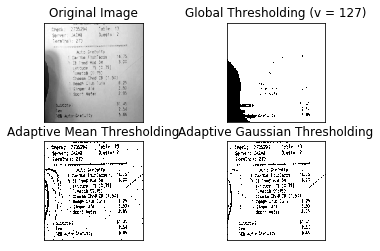

In [33]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('348s_17.jpg', 0)
img = cv2.medianBlur(img, 5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [38]:
img = cv2.imread('348s_17.jpg', 0)

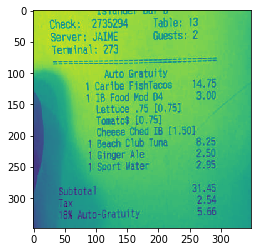

In [40]:
plt.imshow(img)

In [74]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)

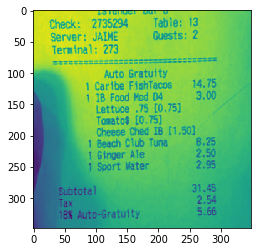

In [75]:
plt.imshow(gray_image)

# open CV - changing color threshold

In [49]:
import cv2
print([i for i in dir(cv2) if i.startswith('COLOR_')])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [56]:
t = np.array(img)

In [93]:
x, y = t.min(),  t.max()

x, y 

(0.0, 255.0)

In [94]:
t = (t - 32) / (y - 32)

t.shape

(348, 348)

In [81]:
t = t * 255

In [84]:
t.min(), t.max()

(0.0, 255.0)

In [86]:
a, b = np.modf(t)


In [106]:
del img

In [107]:
img = cv2.imread('348s_17.jpg',0)

In [109]:
type(img)

NoneType

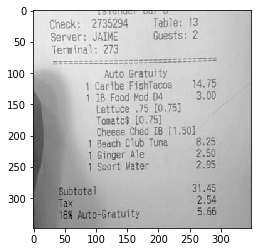

In [134]:
TOZERO = images[-2]

plt.imshow(images[-2], 'gray')



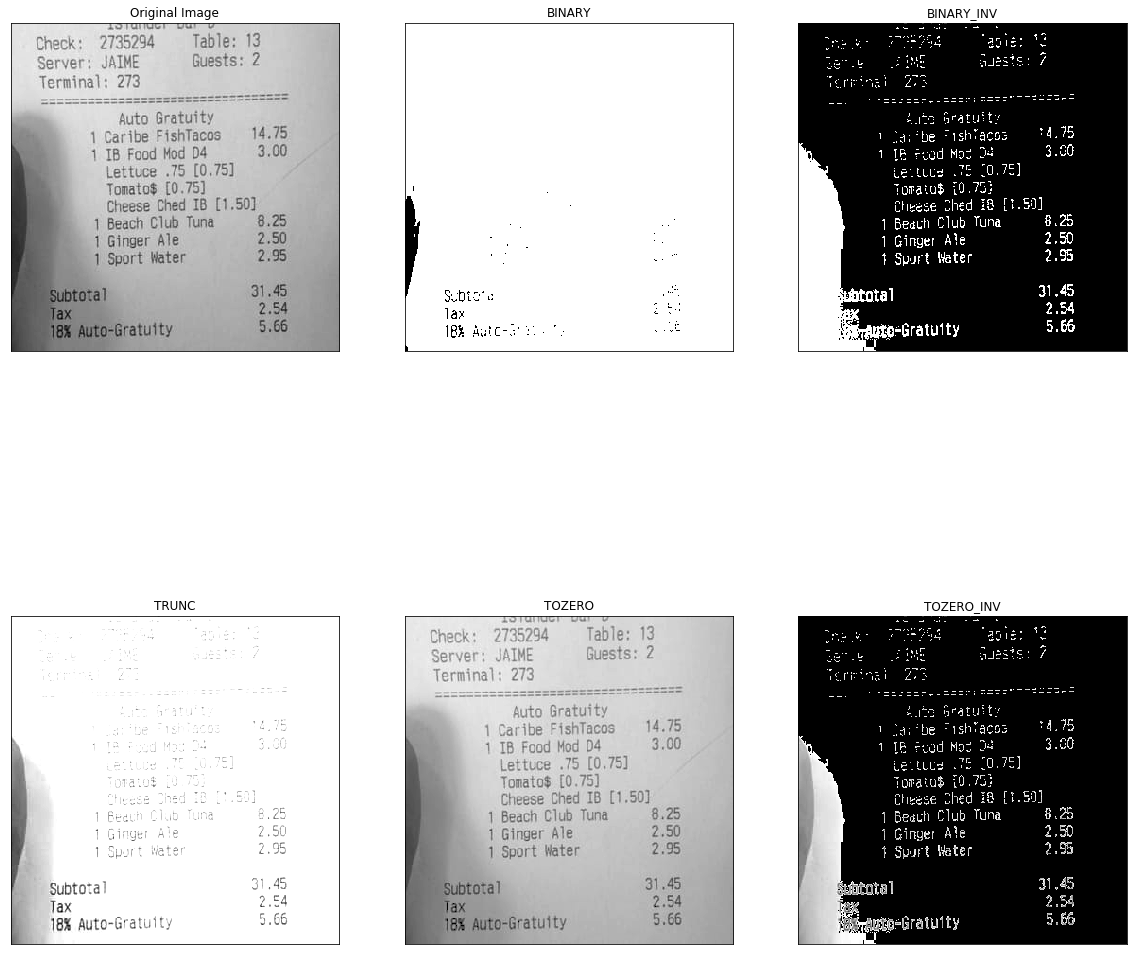

In [131]:
img = cv2.imread('348s_17.jpg',0)
ret,thresh1 = cv2.threshold(img, 75,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]



plt.figure(figsize=(20, 20))

for i in range(6):
    plt.subplot(2,3, i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

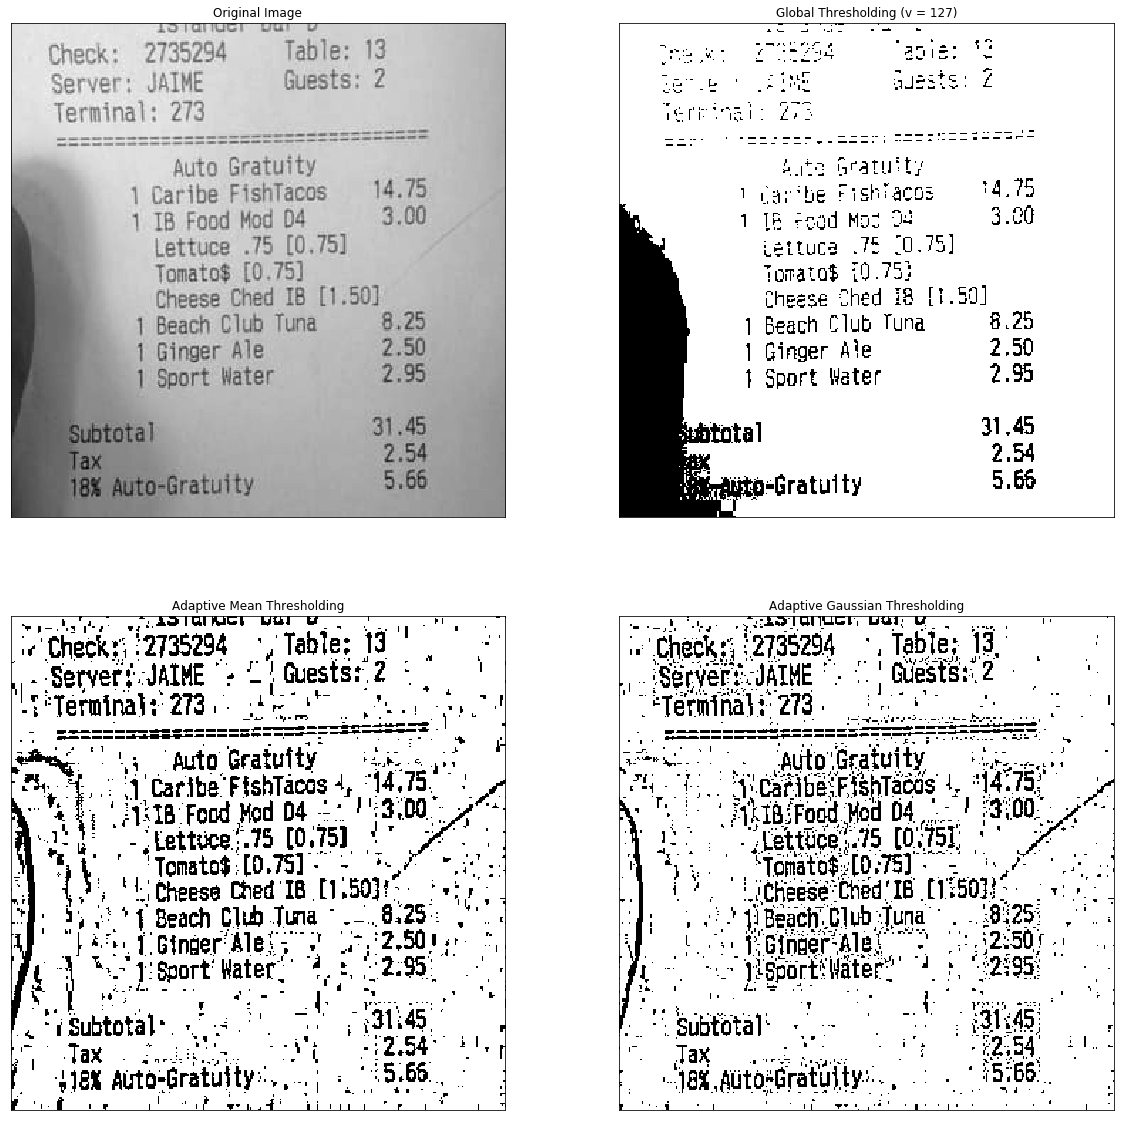

In [128]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('348s_17.jpg',0)
# img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

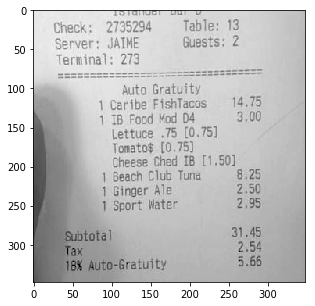

In [140]:
plt.figure(figsize=(5, 5))
plt.imshow(TOZERO, 'gray')

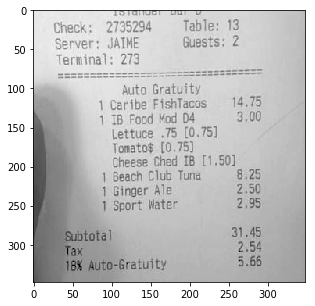

In [160]:
TOZERO_blur = cv2.medianBlur(TOZERO, 1)

plt.figure(figsize=(5, 5))
plt.imshow(TOZERO_blur, 'gray')

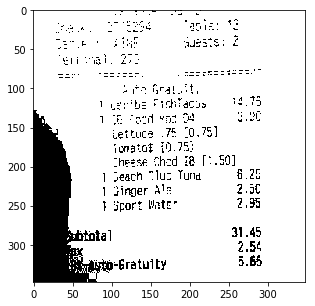

In [161]:
ret,th1 = cv2.threshold(TOZERO,127,255,cv2.THRESH_BINARY)

plt.figure(figsize=(5, 5))
plt.imshow(th1, 'gray')

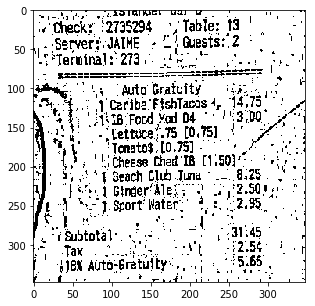

In [163]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(5, 5))
plt.imshow(th2, 'gray')

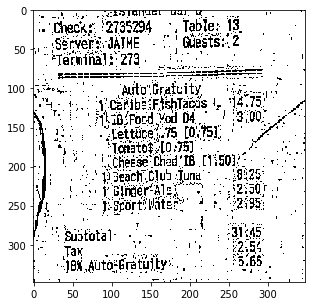

In [164]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(5, 5))
plt.imshow(th3, 'gray')

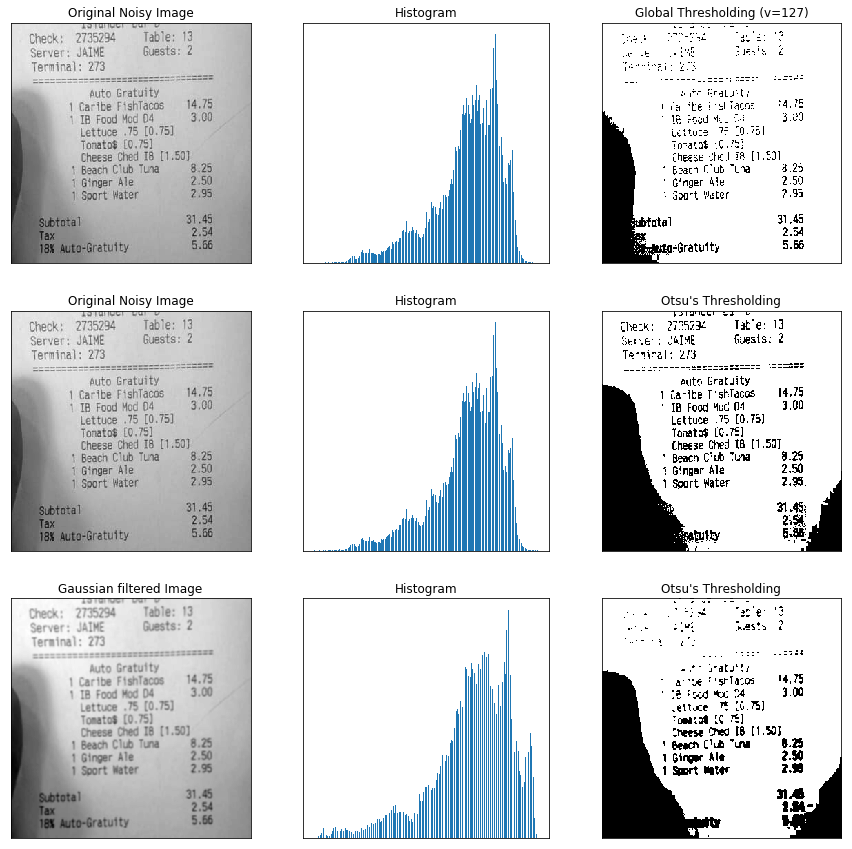

In [166]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('348s_17.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [169]:
img = cv2.imread('348s_17.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

146 149.0


/Users/sampathm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/sampathm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sampathm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


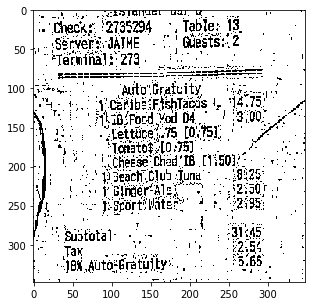

In [177]:
th3 = cv2.adaptiveThreshold(img,147,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(5, 5))
plt.imshow(th3, 'gray')

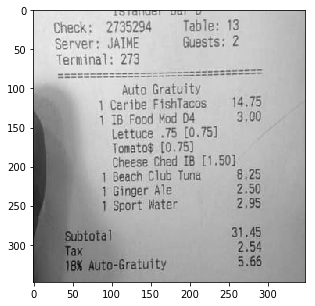

In [178]:
plt.figure(figsize=(5, 5))
plt.imshow(img, 'gray')

In [183]:
clahe.

<CLAHE 0x121da18d0>

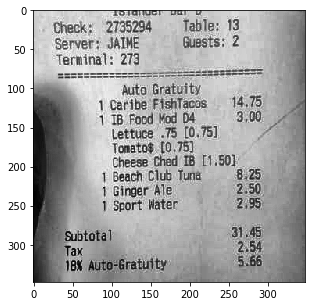

In [185]:
img = cv2.imread('348s_17.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))

plt.figure(figsize=(5, 5))
plt.imshow(clahe.apply(img), 'gray')

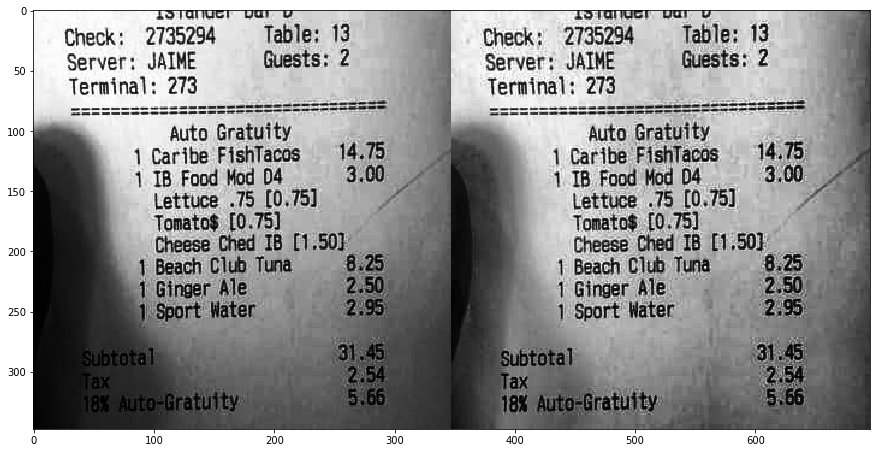

In [218]:
def experiment(image_loc):
    img = cv2.imread(image_loc,0)
    equ = cv2.equalizeHist(img)
    equ_clahe = clahe.apply(equ)
    res = np.hstack((equ, equ_clahe)) #stacking images side-by-side
    plt.figure(figsize=(15, 15))
    plt.imshow(res, 'gray')

experiment('348s_17.jpg')

In [219]:
from glob import glob

all_image = glob('*jpg')

all_image

['711_crayola_receipt_zoomed.jpg',
 'ReceiptSwiss_fullsize.jpg',
 '348s_17.jpg',
 'receipt.jpg']

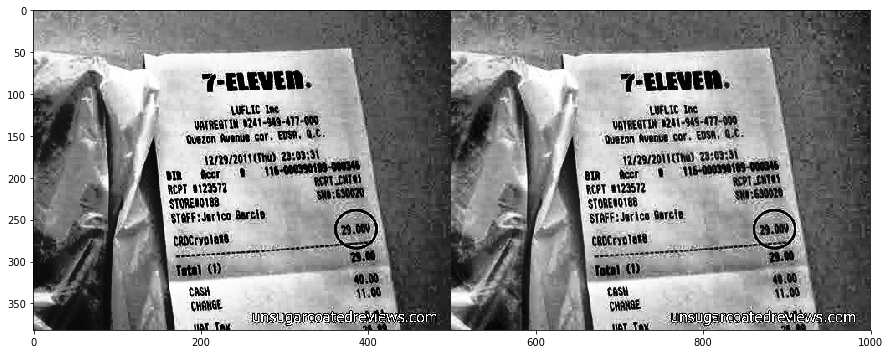

In [220]:
experiment(all_image[0])

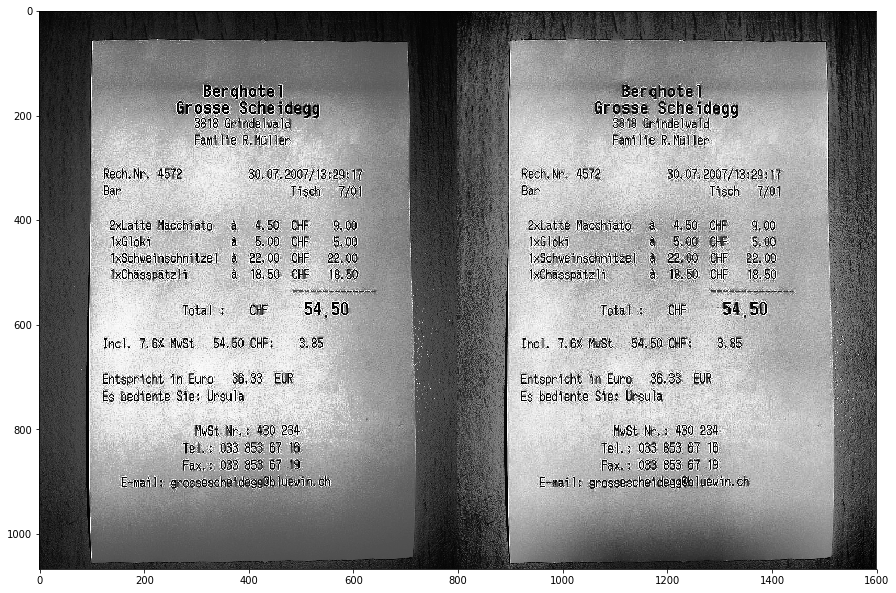

In [221]:
experiment(all_image[1])

## Document scanner

# Freds TextCleaner


In [227]:
!cp -p ReceiptSwiss_fullsize.jpg sample.jpg

In [231]:
!ls *jpg

348s_17.jpg                    out_sample.jpg
711_crayola_receipt_zoomed.jpg receipt.jpg
ReceiptSwiss_fullsize.jpg      sample.jpg


In [228]:
!./textcleaner -g -e stretch -f 25 -o 10 -u -s 1 -T -p 10 sample.jpg out_sample.jpg

In [ ]:
!./textcleaner -g -e stretch -f 25 -o 10 -u -s 1 -T -p 10 348s_17.jpg out_348s_17.jpg

In [233]:
!./textcleaner -g -e stretch -f 25 -o 10 -u -s 1 -T -p 10 711_crayola_receipt_zoomed.jpg out_711_crayola_receipt_zoomed.jpg

__image__: out_sample.jpg
![out_sample.jpg](out_sample.jpg)

__image__: out_348s_17.jpg

![out_348s_17.jpg](out_348s_17.jpg)

__image__: out_711_crayola_receipt_zoomed.jpg
![out_711_crayola_receipt_zoomed.jpg](out_711_crayola_receipt_zoomed.jpg)

In [239]:
import subprocess
subprocess.check_call(['./textcleaner',
 '-g',
 '-e',
 'stretch',
 '-f',
 '25',
 '-o',
 '10',
 '-u',
 '-s',
 '1',
 '-T',
 '-p',
 '10',
 '711_crayola_receipt_zoomed.jpg',
 'out_711_crayola_receipt_zoomed.jpg'])

0